In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls drive/MyDrive/COGS_Project/EDA/Data/

Multivariate_stock_preprocessed.csv  Univariate_Rice_Price_Change.csv


In order to apply techniques for the univariate analyis of the daily change of price rice we need to preprocess the data by applying different techniques, furthermore we need to analyze the data by applying EDA

###1.0 Import Modules

In [6]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set()

In [7]:
df_rice = pd.read_csv("drive/MyDrive/COGS_Project/all_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,39,41,43,50,66,68,70,77,93,95,97,104,120,122,124,131,147,149,151,158,174,176,178,185,201,203,205,212,228,230,232,239,255,257,259,266,282,284,286,293,309,311,313,320,336,338,340,347,363,365,367,374,390,392,394,401,417,419,421,428,444,446,448,455,471,473,475,482,498,500,502,509,525,527,529,536,552,554,556,563,579,581,583,590,606,608,610,617,633,635,637,644,660,662,664,671,687,689,691,698,714,716,718,725,741,743,745,752,768,770,772,779,795,797,799,806,822,824,826,833,849,851,853,860,876,878,880,887,903,905,907,914,930,932,934,957,959,961,968,984,986,988,995,1011,1013,1015,1022,1038,1040,1042,1049,1065,1067,1069,1076,1092,1094,1096,1103,1119,1121,1123,1130,1146,1148,1150,1157,1173,1175,1177,1184,1200,1202,1204,1211,1227,1229,1231,1238,1254,1256,1258,1265,1281,1283,1285,1292,1308,1310,1312,1319,1335,1337,1339,1346,1362,1364,1366,1373,1389,1391,1393,1400,1416,1418,1420,1427,1443,1445,1447,

###2.0 Univariate Prediction Preprocessing

Any model for prediction needs to be free of empty values, the data we use contains empty values as the recording of the market are not always present, therefore we need to both observe where the empty values are and remove the empty values

#### 2.1 Check Empty Values

In [8]:
df_rice = df_rice.iloc[3000:,:]

In [9]:
df_rice

,Unnamed: 0,ZR=F_Open,ZR=F_High,ZR=F_Low,ZR=F_Close,ZR=F_Adj_Close,ZR=F_Volume,CL=F_Open,CL=F_High,CL=F_Low,CL=F_Close,CL=F_Adj_Close,CL=F_Volume,ZW=F_Open,ZW=F_High,ZW=F_Low,ZW=F_Close,ZW=F_Adj_Close,ZW=F_Volume,59211099999_STATION,59211099999.0_LATITUDE,59211099999.0_LONGITUDE,59211099999.0_ELEVATION,59211099999.0_NAME,59211099999.0_TEMP,59211099999.0_TEMP_ATTRIBUTES,59211099999.0_DEWP,59211099999.0_DEWP_ATTRIBUTES,59211099999.0_SLP,59211099999.0_SLP_ATTRIBUTES,59211099999.0_STP,59211099999.0_STP_ATTRIBUTES,59211099999.0_VISIB,59211099999.0_VISIB_ATTRIBUTES,59211099999.0_WDSP,59211099999.0_WDSP_ATTRIBUTES,59211099999.0_MXSPD,59211099999.0_GUST,59211099999.0_MAX,59211099999.0_MAX_ATTRIBUTES,...,47818099999.0_VISIB_ATTRIBUTES.1,47818099999.0_WDSP.1,47818099999.0_WDSP_ATTRIBUTES.1,47818099999.0_MXSPD.1,47818099999.0_GUST.1,47818099999.0_MAX.1,47818099999.0_MAX_ATTRIBUTES.1,47818099999.0_MIN.1,47818099999.0_MIN_ATTRIBUTES.1,47818099999.0_PRCP.1,47818099999.0_PRCP_ATTRIBUTES.1,47818099999.0_SNDP.1,47818099999.0_FRSHTT.1,47912099999_STATION,47912099999.0_LATITUDE,47912099999.0_LONGITUDE,47912099999.0_ELEVATION,47912099999.0_NAME,47912099999.0_TEMP,47912099999.0_TEMP_ATTRIBUTES,47912099999.0_DEWP,47912099999.0_DEWP_ATTRIBUTES,47912099999.0_SLP,47912099999.0_SLP_ATTRIBUTES,47912099999.0_STP,47912099999.0_STP_ATTRIBUTES,47912099999.0_VISIB,47912099999.0_VISIB_ATTRIBUTES,47912099999.0_WDSP,47912099999.0_WDSP_ATTRIBUTES,47912099999.0_MXSPD,47912099999.0_GUST,47912099999.0_MAX,47912099999.0_MAX_ATTRIBUTES,47912099999.0_MIN,47912099999.0_MIN_ATTRIBUTES,47912099999.0_PRCP,47912099999.0_PRCP_ATTRIBUTES,47912099999.0_SNDP,47912099999.0_FRSHTT
3000,2015-01-23,1116.5,1123.5,1096.0,1101.0,1101.0,459.0,46.63,47.76,45.21,45.59,45.59,374289.0,532.75,536.00,526.25,530.0,530.0,57432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,2015-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,2015-01-26,1099.5,1099.5,1081.0,1088.5,1088.5,388.0,45.20,46.41,44.35,45.15,45.15,310638.0,530.75,534.75,519.25,520.5,520.5,52607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,2015-01-27,1089.0,1123.0,1089.0,1097.0,1097.0,396.0,45.13,46.55,44.81,46.23,46.23,313141.0,519.50,524.25,517.50,519.0,519.0,40915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,2021-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,3.1,24.

The data that we gather has recordings of the price open and the price close of the rice stock we are analyzing, we need to get the change of price daily to do this we need to create a new column called **Price Change** which is the substraction of the market close and the market opened

In [10]:
df_rice = df_rice[["Unnamed: 0","ZR=F_Open","ZR=F_Close"]]

In [11]:
df_rice["Price_Change"] = df_rice["ZR=F_Close"] - df_rice["ZR=F_Open"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_rice.drop(["ZR=F_Close","ZR=F_Open"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_rice = df_rice.rename({"Unnamed: 0":"Date"},axis=1)

#### 2.2 Remove empty values

We can see from this graph that from the 1852 days of data we have there is 1410 days where we have data from the market

[]

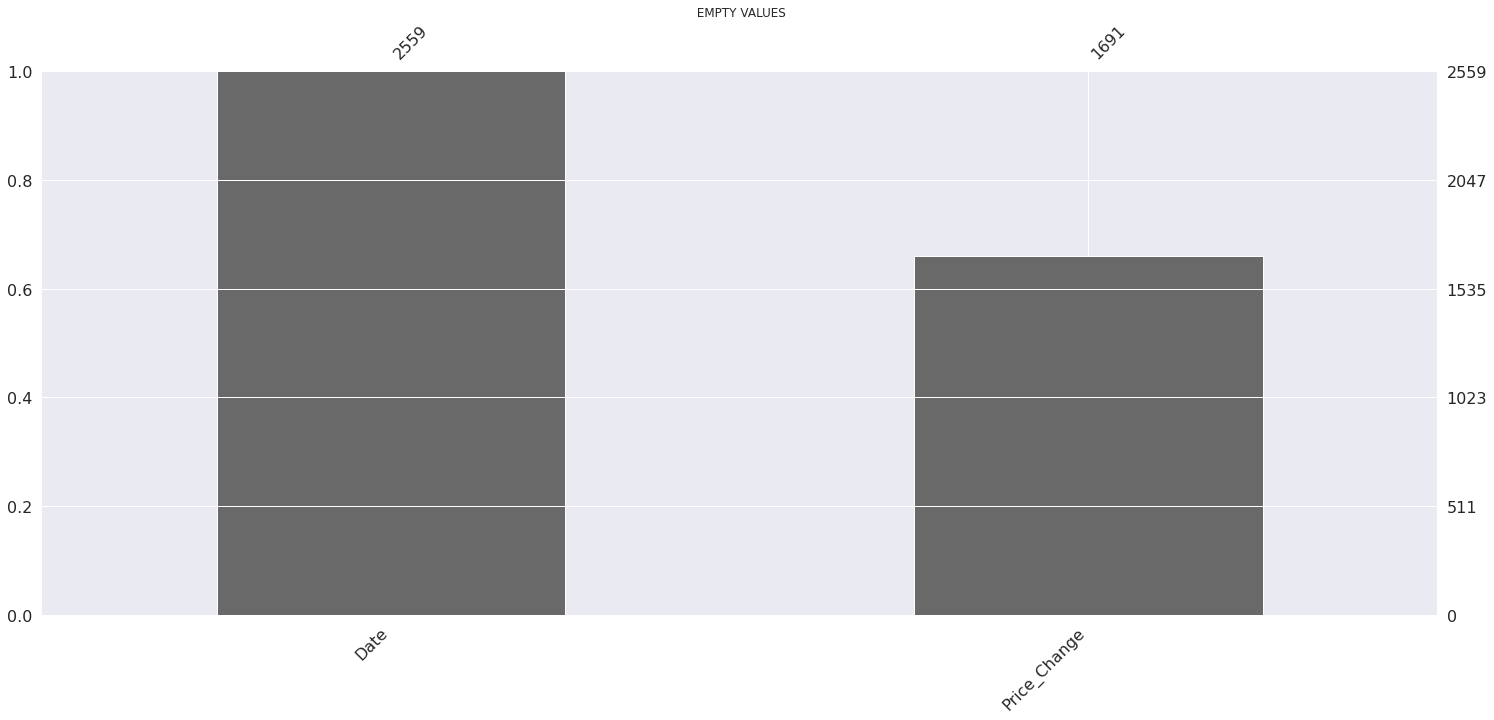

In [14]:
msno.bar(df_rice)
plt.title(" EMPTY VALUES")
plt.ylabel("Number of Empty Values")
plt.plot()

In [15]:
df_rice.columns.tolist()

['Date', 'Price_Change']

[]

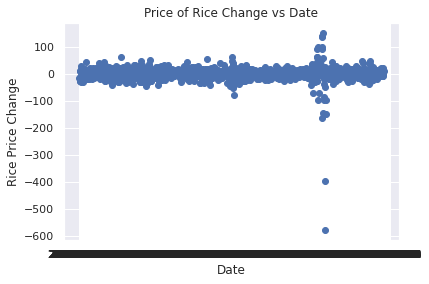

In [16]:
plt.scatter(df_rice["Date"],df_rice["Price_Change"])
plt.xlabel("Date")
plt.ylabel("Rice Price Change")
plt.title("Price of Rice Change vs Date")
plt.plot()

We can check the exact number of empty values and we can see that there is 785 empty values

In [17]:
df_rice.isnull().sum()

Date              0
Price_Change    868
dtype: int64

After creating this new column we can observe the distribution of this column (the rice price difference daily). We can see this distribution is distributed normally around 0. Meaning that the majority of the daily change of price daily is around 0 meaning no change in the price of rice

[]

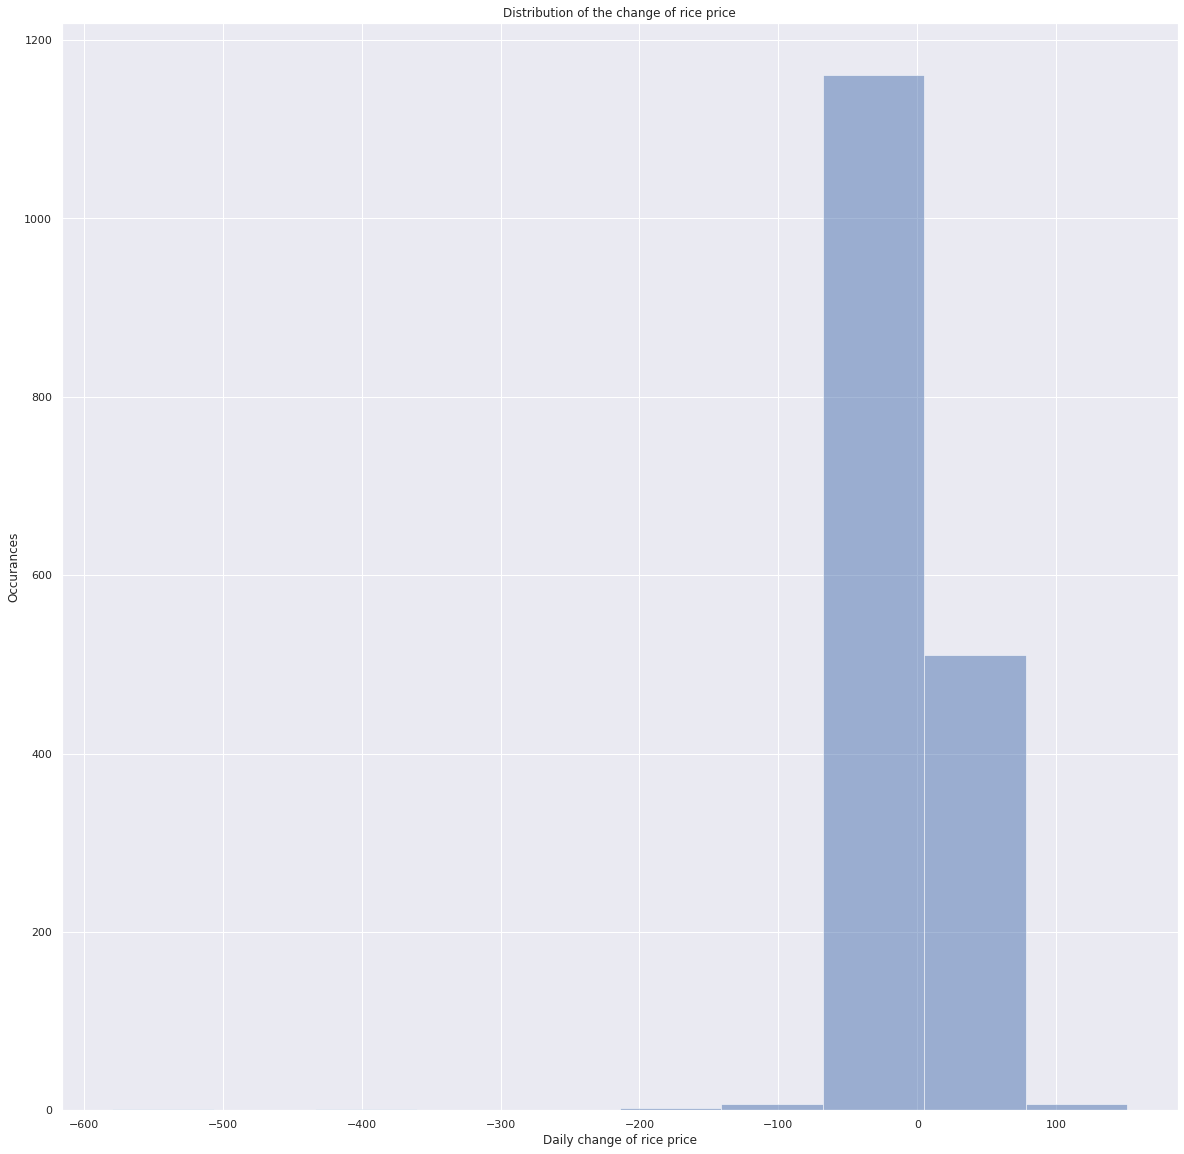

In [18]:
df_rice.hist(alpha=0.5,figsize=(20,20))
plt.xlabel("Daily change of rice price")
plt.ylabel("Occurances")
plt.title("Distribution of the change of rice price")
plt.plot()

[]

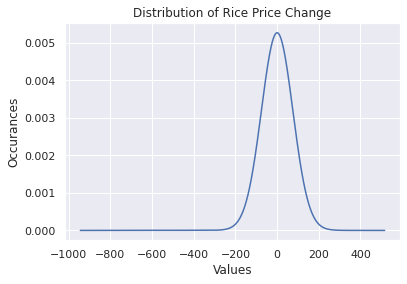

In [19]:
df_rice["Price_Change"].plot.kde(bw_method=3)
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.title("Distribution of Rice Price Change")
plt.plot()

#### 2.3 Input values with Median

As there is a great number of empty values, instead of removing them we are going to input them, using the median as the median is a statistic that dosn´t take outliers into account

In [20]:
df_rice = df_rice.fillna(df_rice.median())

In [21]:
df_rice.isnull().sum()

Date            0
Price_Change    0
dtype: int64

Checking distributions after imputing empy values

[]

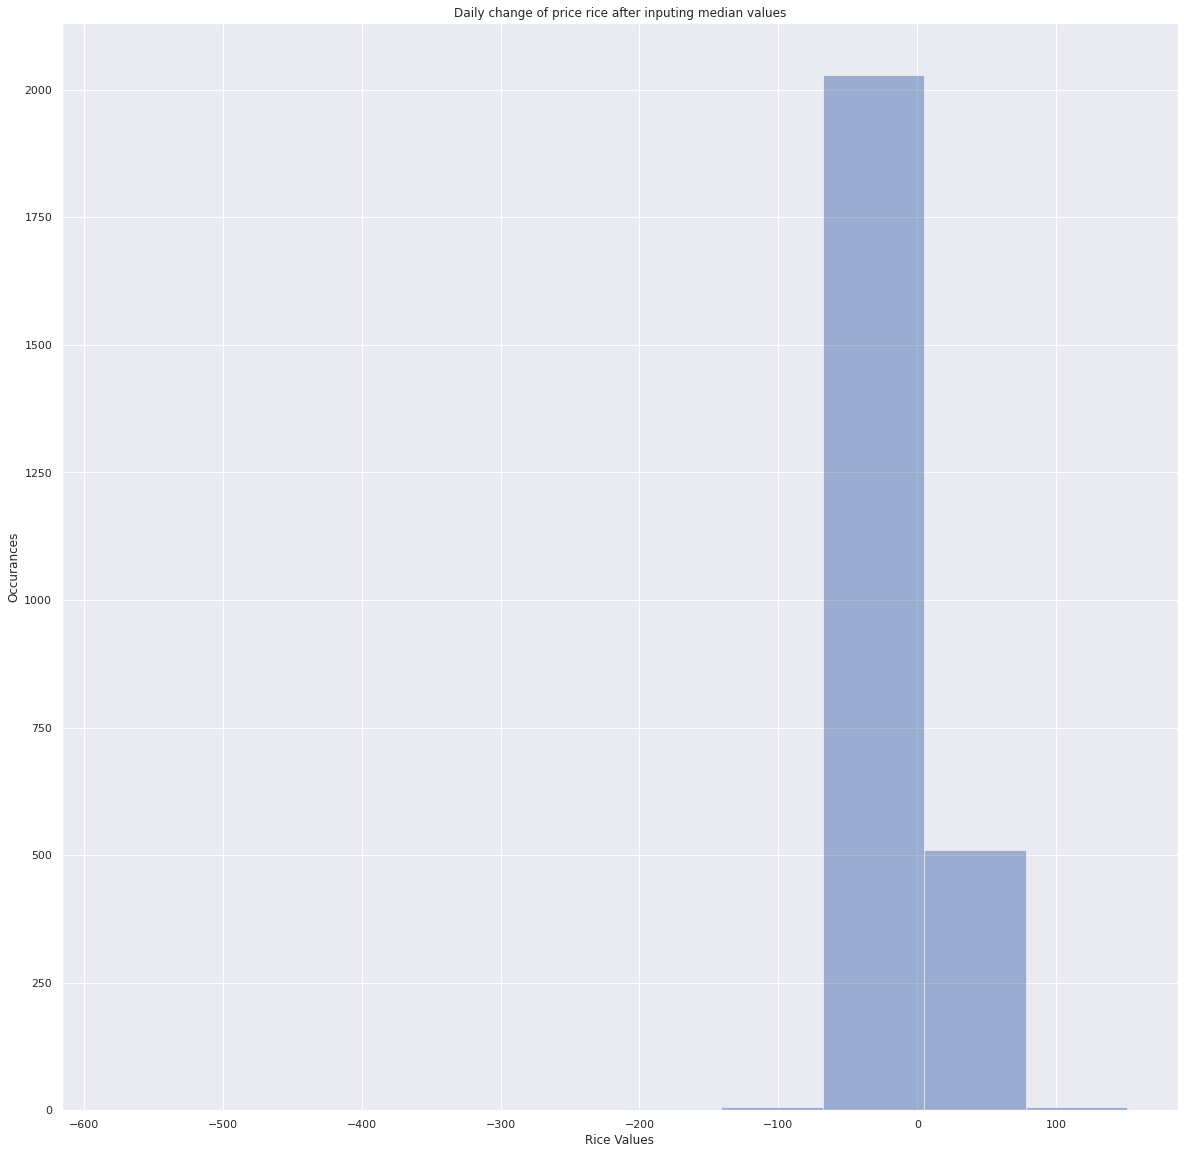

In [22]:
df_rice.hist(alpha=0.5,figsize=(20,20))
plt.xlabel("Rice Values")
plt.ylabel("Occurances")
plt.title("Daily change of price rice after inputing median values")
plt.plot()

[]

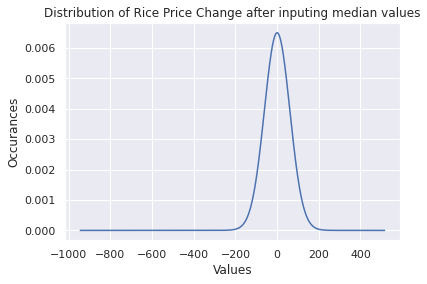

In [23]:
df_rice["Price_Change"].plot.kde(bw_method=3)
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.title("Distribution of Rice Price Change after inputing median values")
plt.plot()

#### 2.4 Remove Outliers

Furthermore in order to accurately predict the daily change of the price rice, we need to remove values that are outliers, from the scatterplot seen before there are some values that are too far from the median, therefore we remove the outliers using the **Interquartile range**

In [24]:
Q1 = df_rice.quantile(0.25)
Q3 = df_rice.quantile(0.75)
IQR = Q3-Q1

In [25]:
out_param = 1.5

In [26]:
df_rice = df_rice[~((df_rice < (Q1 - out_param * IQR)) |(df_rice > (Q3 + out_param * IQR))).any(axis=1)]


[]

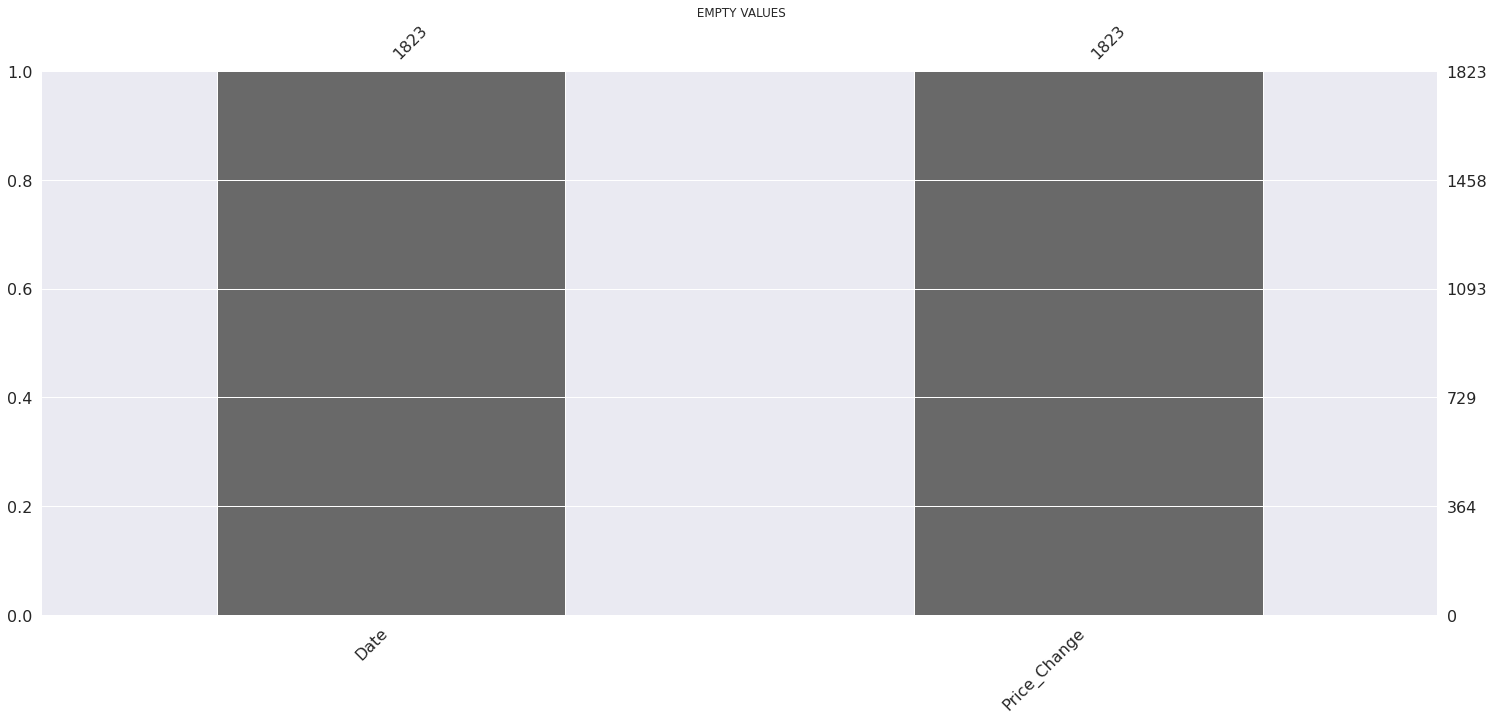

In [27]:
msno.bar(df_rice)
plt.title(" EMPTY VALUES")
plt.ylabel("Number of Empty Values")
plt.plot()

In [28]:
df_rice

,Date,Price_Change
3001,2015-01-24,0.0
3002,2015-01-25,0.0
3004,2015-01-27,8.0
3008,2015-01-31,0.0
3009,2015-02-01,0.0
...,...,...
5554,2021-12-02,0.0
5555,2021-12-03,0.0
5556,2021-12-04,0.0
5557,2021-12-05,0.0


#### 2.5 Input values after removing Outliers

After removing the outliers we can see that we have empty values, therefore we need to input these values with the **median** for a second time

In [29]:
df_rice = df_rice.fillna(df_rice.median())

In [30]:
df_rice.isnull().sum()

Date            0
Price_Change    0
dtype: int64

In [31]:
df_rice_plot = df_rice.iloc[lambda x: x.index % 200 == 0]

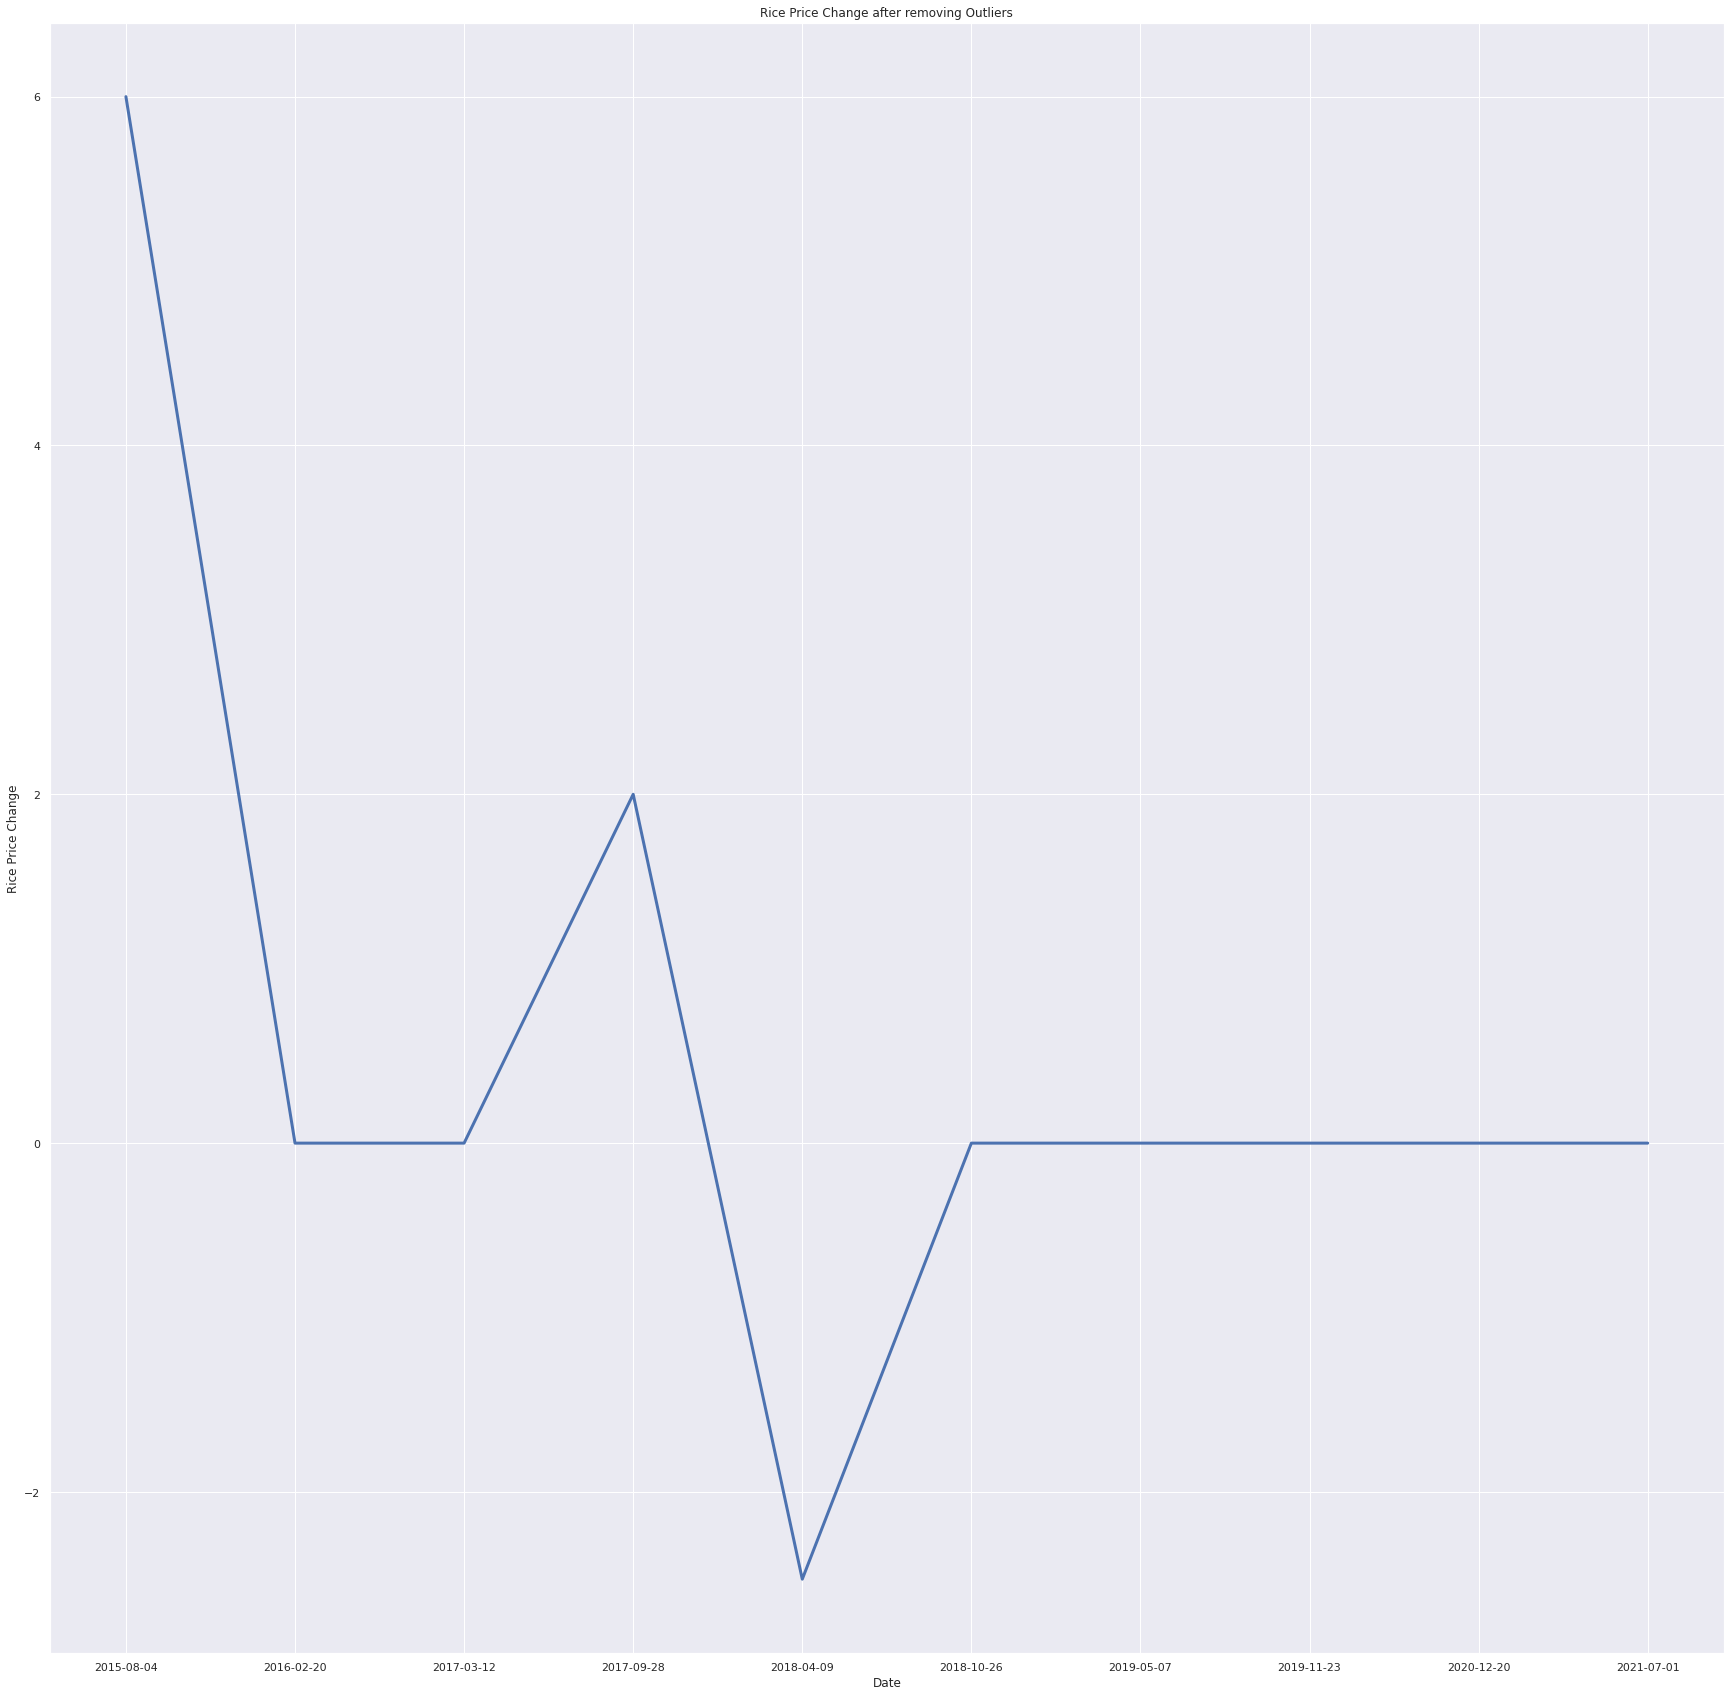

In [ ]:
plt.figure(figsize=(30,30))
plt.plot(df_rice_plot["Date"],df_rice_plot["Price_Change"],linewidth=3)
plt.xlabel("Date")
plt.ylabel("Rice Price Change")
plt.title("Rice Price Change after removing Outliers")
plt.show()

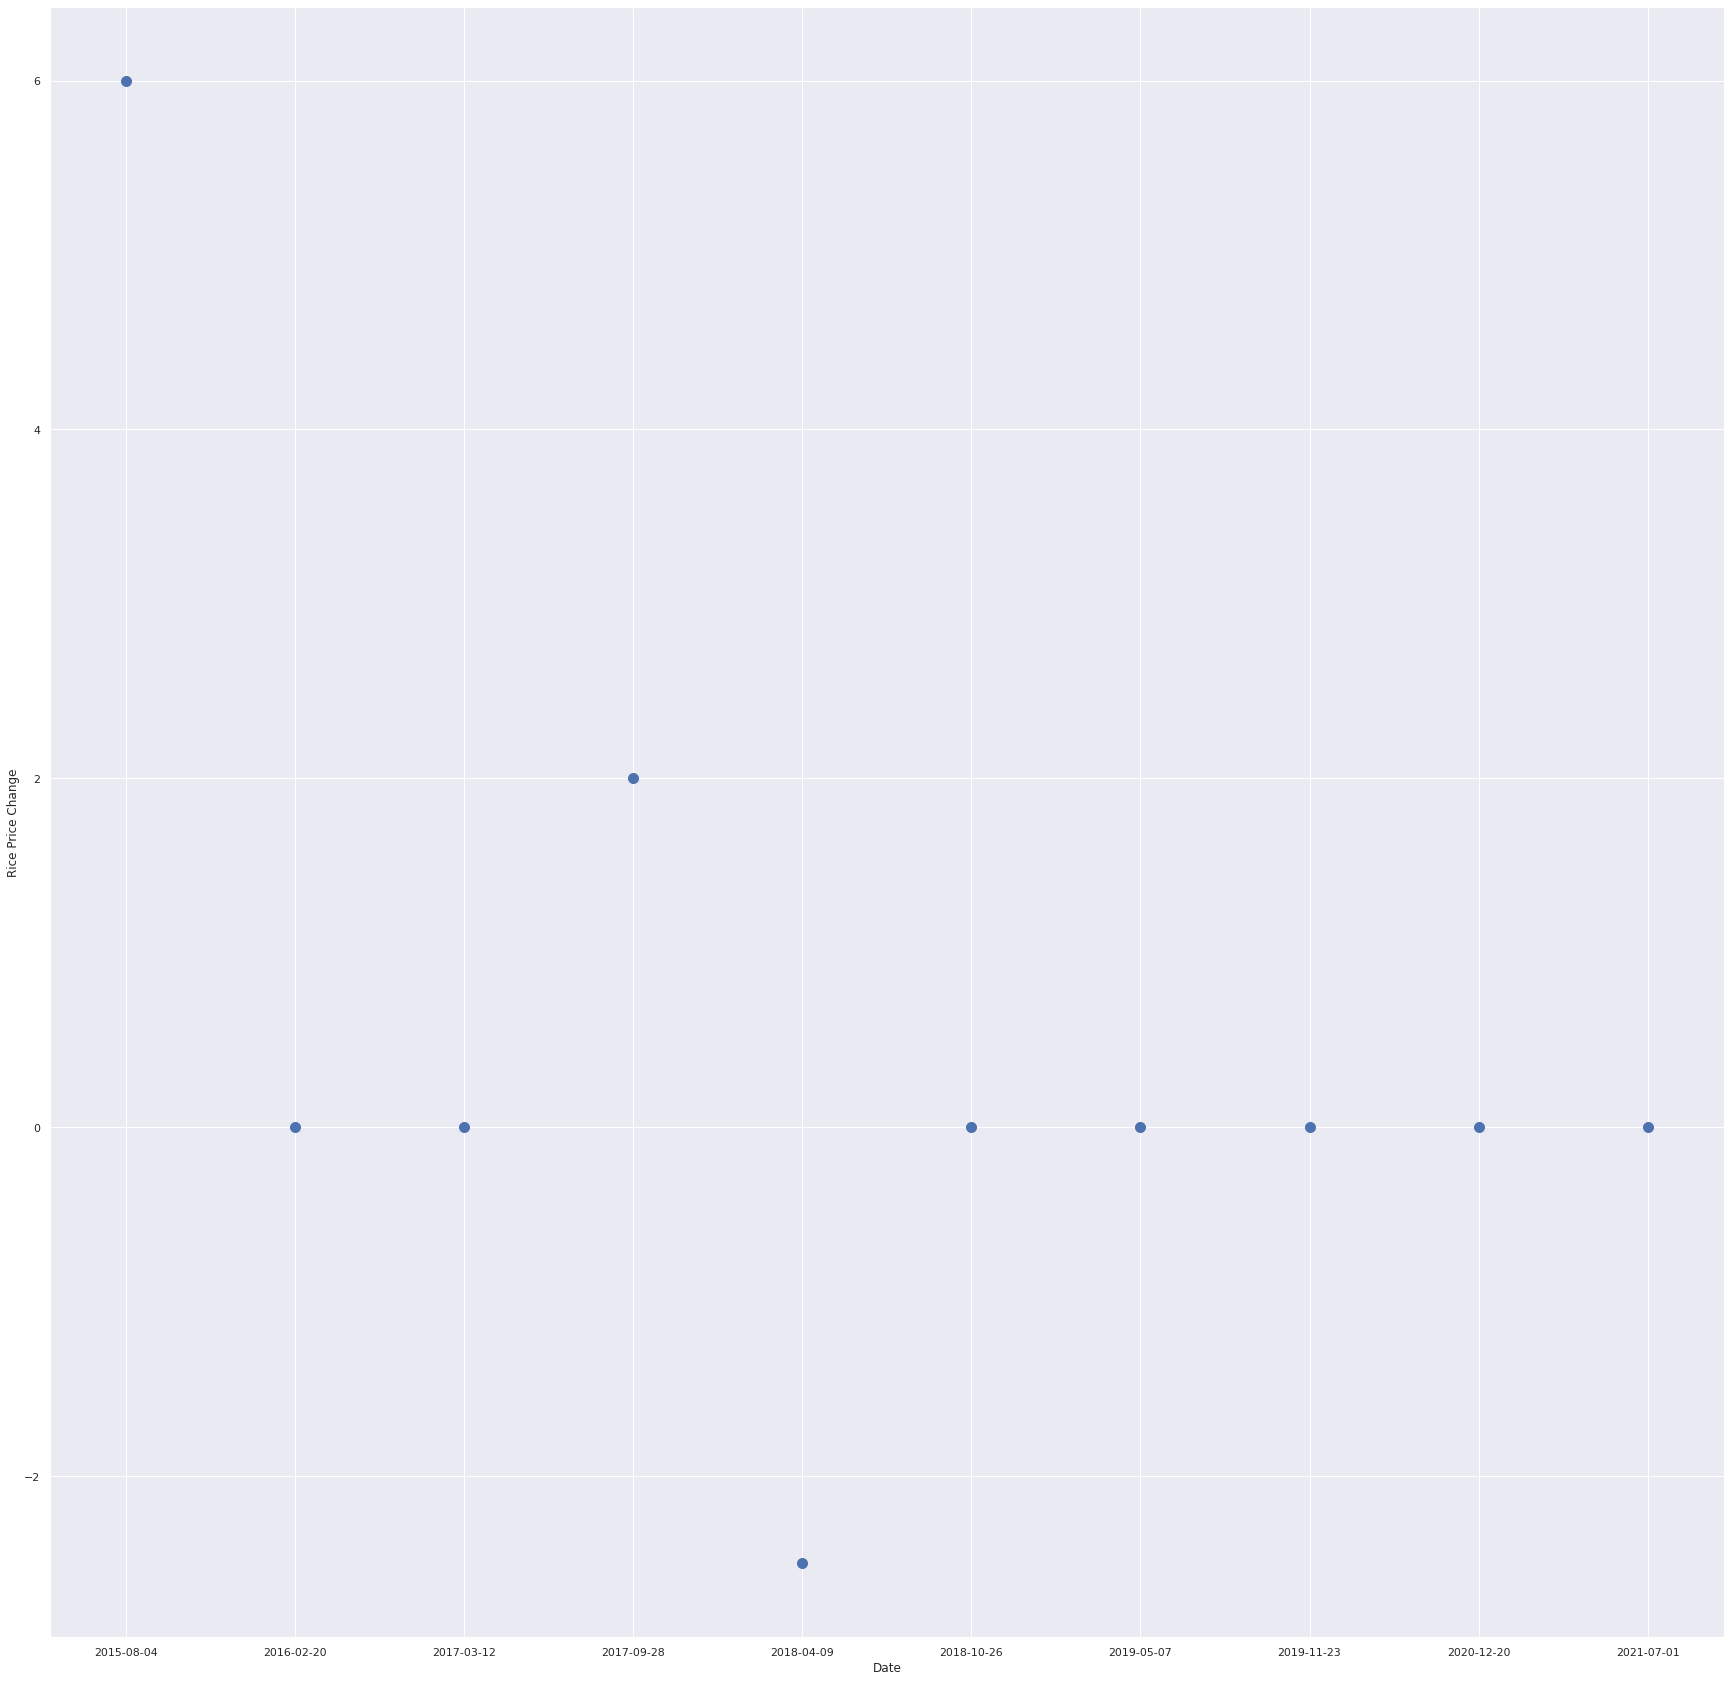

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(df_rice_plot["Date"],df_rice_plot["Price_Change"],s=100)
plt.xlabel("Date")
plt.ylabel("Rice Price Change")
plt.show()

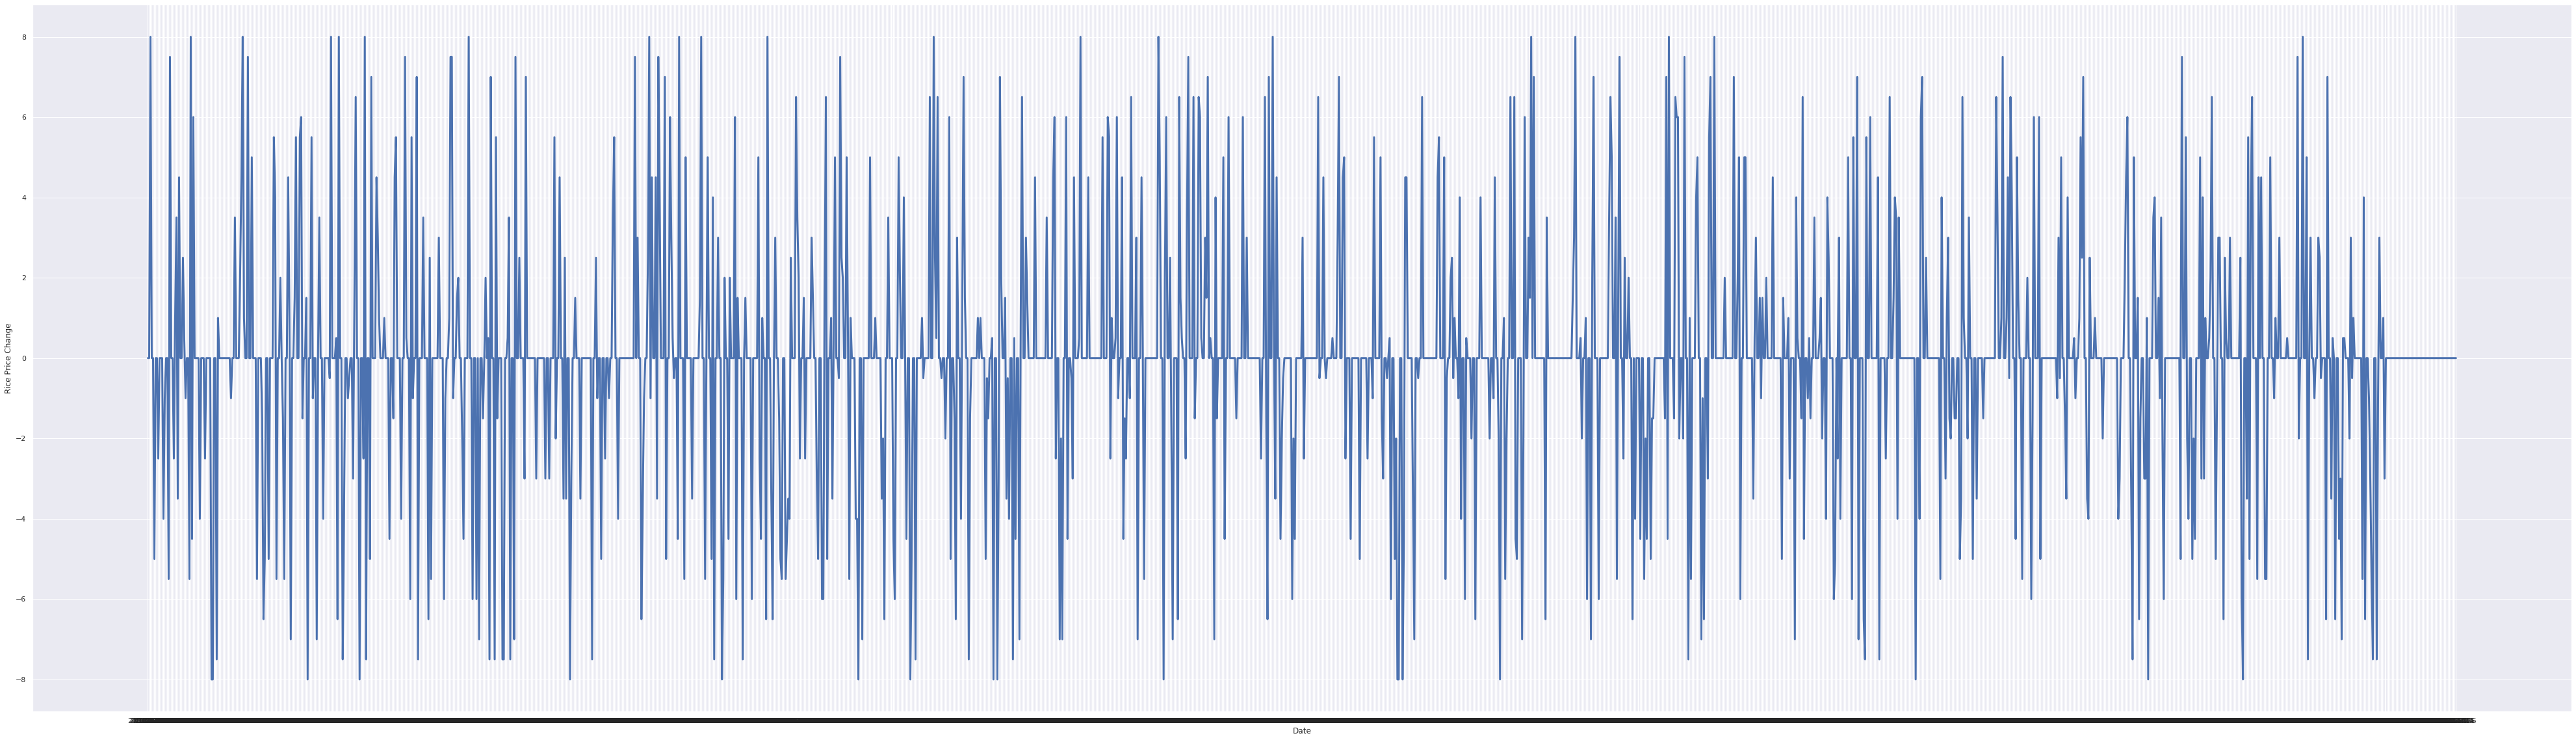

In [ ]:
plt.figure(figsize=(70,20))
plt.plot(df_rice["Date"],df_rice["Price_Change"],linewidth=3)
plt.xlabel("Date")
plt.ylabel("Rice Price Change")
plt.show()

[]

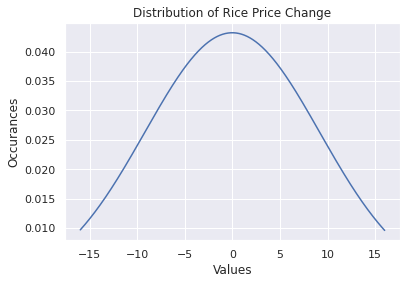

In [ ]:
df_rice["Price_Change"].plot.kde(bw_method=3)
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.title("Distribution of Rice Price Change")
plt.plot()

In [1]:
df_rice["Price_Change"].boxplot()
plt.xlabel("Values")
plt.ylabel("Occurances")
plt.title("Distribution of Rice Price Change")
plt.plot()

NameError: ignored

After applying all the preprocessing steps we can see that the distribution of the daily change of rice price is completely normal. The data is ready to be used for **univariate prediction** of the price of rice

#### 4.0 Export Data

In [ ]:
df_rice.to_csv("drive/MyDrive/COGS_Project/EDA/Data/Univariate_Rice_Price_Change.csv")